<a href="https://colab.research.google.com/github/tramaglino/naturalistic_data_analysis/blob/master/brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nilearn
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

import nibabel as nib
import os
import numpy as np
from nilearn import image, plotting, maskers
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#==================================

In [4]:

data_dir = '/content/drive/MyDrive/Action_teresi/101/'
sub = 'sub-012_allruns_cleaned_sm6_SG_MNInlin.nii.gz'

In [5]:
## Loading images

nii_img  = nib.load(os.path.join(data_dir, sub))
nii_img.shape


nii_numpy = nii_img.get_fdata()[:,:,:, 10:50]

In [ ]:
print(nii_numpy.shape)
nii_numpy


In [8]:
#too big in memory to load all the volumes and plot them 

print(image.load_img(data_dir + sub).shape)
selected_volumes = image.index_img((data_dir + sub), slice(3, 50))

(64, 76, 64, 1614)


In [ ]:
#iter_img takes the 3d volume and then with plot_stat_map I can plot it
for img in image.iter_img(selected_volumes):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img, threshold=0.3, display_mode="z", cut_coords=1,
                           colorbar=False)
plotting.show()

In [21]:

from nilearn.maskers import NiftiMasker

# As this is raw movie watching based EPI, the background is noisy and we
# cannot rely on the 'background' masking strategy. We need to use the 'epi'
# one
nifti_masker = NiftiMasker(standardize=True, mask_strategy='gm-template',
                           memory="nilearn_cache", memory_level=2,
                           smoothing_fwhm=1)
nifti_masker.fit(selected_volumes)
mask_img = nifti_masker.mask_img_

/usr/local/lib/python3.8/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_brain_mask at 0x7f4c55424d30>, mask_type='gm'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),
/usr/local/lib/python3.8/dist-packages/joblib/memory.py:810: UserWarning: Cannot inspect object functools.partial(<function compute_brain_mask at 0x7f4c55424d30>, mask_type='gm'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,
/usr/local/lib/python3.8/dist-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_brain_mask at 0x7f4c55424d30>, mask_type='gm'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


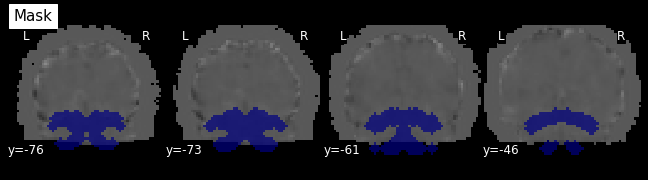

In [22]:
from nilearn.plotting import plot_roi
from nilearn.image.image import mean_img

# calculate mean image for the background
mean_func_img = mean_img(selected_volumes)

plot_roi(mask_img, mean_func_img, display_mode='y', cut_coords=4, title="Mask")

In [23]:
report = nifti_masker.generate_report()
report

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,gm-template
memory,Memory(location=nilearn_cache/joblib)
memory_level,2


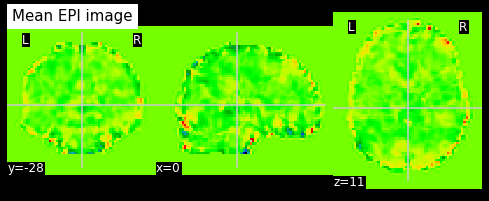

In [24]:
mean_img = image.mean_img(selected_volumes)
plot_epi(mean_img, title='Mean EPI image')

In [ ]:
masker = NiftiMasker(mask_strategy='gm-template')
masker.fit(selected_volumes)
report = masker.generate_report()
report

In [27]:
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']



Dataset created in /root/nilearn_data/msdl_atlas



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/msdl_atlas/8eaecb9e05c478f565847000d9902a25/MSDL_rois.zip..... done.


In [30]:
from nilearn.maskers import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)
masker.fit(selected_volumes)
time_series = masker.transform(selected_volumes)

[NiftiMapsMasker.fit] loading regions from /root/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f4c4ad451c0>, interpolation='continuous', target_shape=(64, 76, 64), target_affine=array([[   3. ,   -0. ,   -0. ,  -94.5],
       [  -0. ,    3. ,   -0. , -130.5],
       [   0. ,    0. ,    3. ,  -76.5],
       [   0. ,    0. ,    0. ,    1. ]]))


/usr/local/lib/python3.8/dist-packages/nilearn/_utils/cache_mixin.py:307: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


_____________________________________________________resample_img - 3.4s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7f4c51abbbe0>, <nilearn.maskers.nifti_maps_masker._ExtractionFunctor object at 0x7f4c4ca65e80>, { 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': '/root/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(64, 76, 64, 7),
affin

In [31]:
report = masker.generate_report(displayed_maps=[2, 6, 7, 16, 21])
report

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Parameter,Value
allow_overlap,True
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
maps_img,/root/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
mask_img,None
memory,Memory(location=nilearn_cache/joblib)
memory_level,1


In [32]:
print(time_series.shape)

(7, 39)


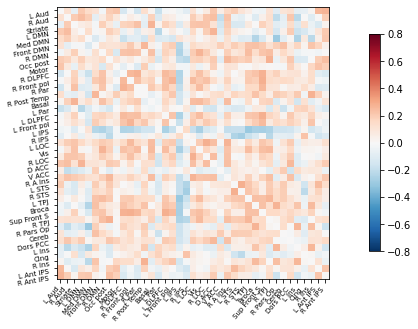

In [33]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)

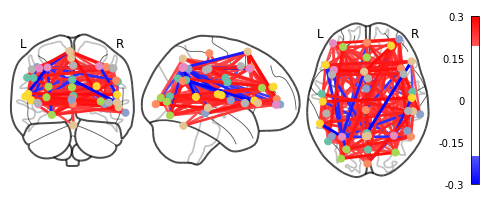

In [34]:
from nilearn import plotting
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%", colorbar=True)

plotting.show()


In [37]:
view = plotting.view_connectome(correlation_matrix, coords, edge_threshold='80%')

# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view.open_in_browser()

In [38]:
!pip install brainiak

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 12.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.5 MB 57.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.8 MB 52.4 MB/s 
     |████████████████████████████████| 6.2 MB 37.7 MB/s 
     |████████████████████████████████| 2.0 MB 42.2 MB/s 
     |████████████████████████████████| 101 kB 12.4 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for brainiak: filename=brainiak-0.11-cp38-cp38-linux_x86_64.whl size=1119192 sha256=11e73b3e02e0cb71a0a4ce644f0b2cd9d6c3fd4615ea80c927a02df2c5b2ee0b
  Stored in directory: /root/.cache/

In [39]:
import brainiak